In [85]:
# This program attempts to optimize a user's Stock Portfolio (FAANG) with the Efficient Frontier.
## CITATION: https://www.youtube.com/watch?v=9fjs8FeLMJk&t=190s

In [86]:
# DEPENDENCIES
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [87]:
# Get the stock symbols / tickers in the portfolio 
# FAANG 
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'] 

In [88]:
# Assign weights to our stocks
weights = np.array ([0.2, 0.2, 0.2, 0.2, 0.2])

In [89]:
# Get the stock/portfolio starting date
stock_start_date = '2015-01-01'

In [90]:
# Get the stock/portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')
today 

'2020-09-30'

In [91]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

In [92]:
# Store the adjusted close price of the stock into the dataframe
for stock in assets: 
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stock_start_date, end=today)['Adj Close']

In [93]:
# Show the dataframe
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
2015-01-02,78.449997,308.519989,24.941502,49.848572,523.373108
2015-01-05,77.190002,302.190002,24.238857,47.311428,512.463013
2015-01-06,76.150002,295.290009,24.241146,46.501427,500.585632
2015-01-07,76.150002,298.420013,24.581060,46.742859,499.727997
2015-01-08,78.180000,300.459991,25.525522,47.779999,501.303680


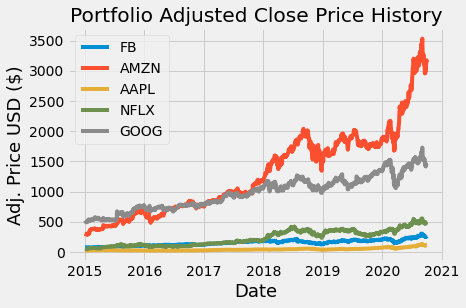

In [94]:
# Show the stock / portfolio
title = 'Portfolio Adjusted Close Price History'

# Grab the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

As indicated by the graph above, the most expensive stock is **Amazon** and the least expensive stock is **Apple**. This is subject to change depending on how the stock market reacts to changes in the economy.

In [95]:
# Show the daily simple returns
returns = df.pct_change() 
returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153


In [96]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual.head()

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.099695,0.057650,0.052784,0.059820,0.056784
AMZN,0.057650,0.095440,0.049259,0.068539,0.054572
AAPL,0.052784,0.049259,0.086541,0.051252,0.048394
NFLX,0.059820,0.068539,0.051252,0.181125,0.056422
GOOG,0.056784,0.054572,0.048394,0.056422,0.072359


In [97]:
# Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.0658444648199738

In [98]:
# Calculate the portfolio volatility which is the standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2566017630882021

In [99]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean() * weights) * 252
portfolio_simple_annual_return

0.3454122304290867

In [100]:
# Show the expected annual return, volatility (risk), and variance
var_percent = str(round(port_variance, 2) * 100) + '%'
vols_percent = str(round(port_volatility, 2) * 100) + '%'
rets_percent = str(round(portfolio_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: ' + rets_percent)
print("Annual volatility: " + vols_percent)
print("Annual variance: " + var_percent)


Expected annual return: 35.0%
Annual volatility: 26.0%
Annual variance: 7.000000000000001%


A 35% annual return for 26% volatility for risk is what we currently have. From these results, we want to have a higher rate of return for a lower risk. 

In [101]:
pip install PyPortfolioOpt

In [102]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [103]:
# Calculate the expected returns and the annualized sample covariance matrix
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.7656), ('AAPL', 0.06505), ('NFLX', 0.16936), ('GOOG', 0.0)])
Expected annual return: 48.5%
Annual volatility: 29.2%
Sharpe Ratio: 1.59


(0.48514252600109864, 0.2920806475624832, 1.5925140192713154)

Our expected annual return went up from 35% to 48.5% so this is a more optimal portfolio. 

In [104]:
0.7656 + 0.06505 + 0.16936

1.0000099999999998

In [105]:
# Get the discrete allocation of each share
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 1, 'NFLX': 1}
Funds remaining: $392.43


With this program, we can see that the most efficient way to utilize 1,000 dollars for purchasing stocks, is to purchase **1 share of Apple** and **1 share of Netflix**. Your remaining funds will then be **$392.43**. 